In [7]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
num_epochs = 100
batch_size = 64
learning_rate = 0.0002
image_size = 28
image_channels = 1
latent_dim = 100

In [10]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

mnist_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

data_loader = DataLoader(dataset=mnist_dataset,
                         batch_size=batch_size,
                         shuffle=True)

100%|██████████| 9.91M/9.91M [01:09<00:00, 143kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 245kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 485kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.78MB/s]


In [17]:
class Generator(nn.Module):
    def __init__(self) :

        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, out_channels=256, kernel_size=7, stride=1, padding=0),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
             nn.ConvTranspose2d(128, image_channels, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(image_channels, 128, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 7, 1, 0),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [18]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [19]:
criterion = nn.BCELoss()
optimizer_g = torch.optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

Epoch [30/100], Batch [100/938], D_real: 0.8410, D_fake: 0.1038, Loss_D: 0.3251, Loss_G: 2.7812
Epoch [30/100], Batch [200/938], D_real: 0.8822, D_fake: 0.3583, Loss_D: 0.7073, Loss_G: 1.2563
Epoch [30/100], Batch [300/938], D_real: 0.7439, D_fake: 0.1720, Loss_D: 0.6186, Loss_G: 2.8116
Epoch [30/100], Batch [400/938], D_real: 0.8719, D_fake: 0.4175, Loss_D: 0.8427, Loss_G: 2.0137
Epoch [30/100], Batch [500/938], D_real: 0.9204, D_fake: 0.4668, Loss_D: 0.9805, Loss_G: 1.5013
Epoch [30/100], Batch [600/938], D_real: 0.7527, D_fake: 0.1198, Loss_D: 0.4976, Loss_G: 2.3912
Epoch [30/100], Batch [700/938], D_real: 0.6081, D_fake: 0.1463, Loss_D: 0.8572, Loss_G: 2.5568
Epoch [30/100], Batch [800/938], D_real: 0.8164, D_fake: 0.2104, Loss_D: 0.5355, Loss_G: 2.9625
Epoch [30/100], Batch [900/938], D_real: 0.9131, D_fake: 0.2285, Loss_D: 0.4124, Loss_G: 2.3531


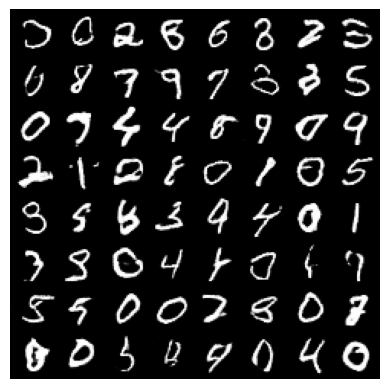

Epoch [31/100], Batch [100/938], D_real: 0.7399, D_fake: 0.1500, Loss_D: 0.5556, Loss_G: 2.3622
Epoch [31/100], Batch [200/938], D_real: 0.8323, D_fake: 0.2699, Loss_D: 0.5954, Loss_G: 1.7767
Epoch [31/100], Batch [300/938], D_real: 0.6191, D_fake: 0.0594, Loss_D: 0.7082, Loss_G: 3.8388
Epoch [31/100], Batch [400/938], D_real: 0.6934, D_fake: 0.1236, Loss_D: 0.6121, Loss_G: 2.8354
Epoch [31/100], Batch [500/938], D_real: 0.6919, D_fake: 0.0935, Loss_D: 0.5845, Loss_G: 2.0632
Epoch [31/100], Batch [600/938], D_real: 0.7531, D_fake: 0.2197, Loss_D: 0.6509, Loss_G: 1.9567
Epoch [31/100], Batch [700/938], D_real: 0.8096, D_fake: 0.4632, Loss_D: 1.1526, Loss_G: 1.7965
Epoch [31/100], Batch [800/938], D_real: 0.7916, D_fake: 0.2354, Loss_D: 0.6036, Loss_G: 1.6368
Epoch [31/100], Batch [900/938], D_real: 0.8076, D_fake: 0.4027, Loss_D: 1.0194, Loss_G: 1.4525


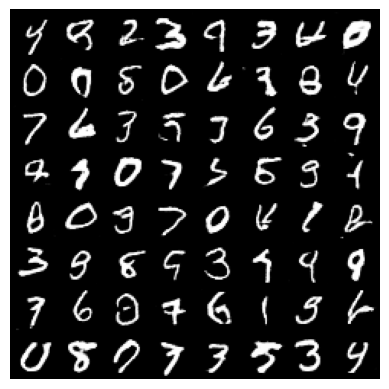

Epoch [32/100], Batch [100/938], D_real: 0.8268, D_fake: 0.1811, Loss_D: 0.4479, Loss_G: 2.7855
Epoch [32/100], Batch [200/938], D_real: 0.8654, D_fake: 0.2046, Loss_D: 0.4351, Loss_G: 2.4252
Epoch [32/100], Batch [300/938], D_real: 0.6953, D_fake: 0.1097, Loss_D: 0.5680, Loss_G: 2.9346
Epoch [32/100], Batch [400/938], D_real: 0.8397, D_fake: 0.3567, Loss_D: 0.7380, Loss_G: 1.5824
Epoch [32/100], Batch [500/938], D_real: 0.7945, D_fake: 0.1308, Loss_D: 0.4152, Loss_G: 3.3290
Epoch [32/100], Batch [600/938], D_real: 0.6891, D_fake: 0.1427, Loss_D: 0.6279, Loss_G: 2.5221
Epoch [32/100], Batch [700/938], D_real: 0.8752, D_fake: 0.3035, Loss_D: 0.5908, Loss_G: 2.4360
Epoch [32/100], Batch [800/938], D_real: 0.8752, D_fake: 0.3847, Loss_D: 0.7958, Loss_G: 2.2446
Epoch [32/100], Batch [900/938], D_real: 0.8449, D_fake: 0.2536, Loss_D: 0.5820, Loss_G: 1.1577


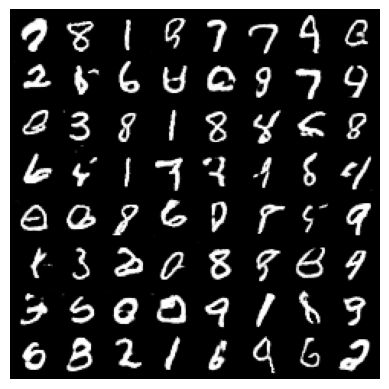

Epoch [33/100], Batch [100/938], D_real: 0.7450, D_fake: 0.1938, Loss_D: 0.6204, Loss_G: 1.9791
Epoch [33/100], Batch [200/938], D_real: 0.8952, D_fake: 0.2449, Loss_D: 0.4737, Loss_G: 1.9503
Epoch [33/100], Batch [300/938], D_real: 0.7758, D_fake: 0.2250, Loss_D: 0.6454, Loss_G: 2.7318
Epoch [33/100], Batch [400/938], D_real: 0.8695, D_fake: 0.2198, Loss_D: 0.4332, Loss_G: 2.3533
Epoch [33/100], Batch [500/938], D_real: 0.9171, D_fake: 0.3903, Loss_D: 0.7696, Loss_G: 1.7461
Epoch [33/100], Batch [600/938], D_real: 0.7945, D_fake: 0.2166, Loss_D: 0.5655, Loss_G: 2.5888
Epoch [33/100], Batch [700/938], D_real: 0.8598, D_fake: 0.2418, Loss_D: 0.5121, Loss_G: 1.9998


KeyboardInterrupt: 

In [20]:
import torchvision


for epoch in range(num_epochs):
    
    for i, (real_images, _) in enumerate(data_loader):
        
        real_images = real_images.cuda()
        batch_size = real_images.shape[0]

        # Discriminating
        optimizer_d.zero_grad()
        label_real = torch.ones(batch_size, 1).cuda()
        output_real = discriminator(real_images).view(-1, 1)
        loss_real = criterion(output_real, label_real)
        loss_real.backward()

        # Fake images
        noise = torch.randn(batch_size, latent_dim, 1, 1).cuda()
        fake_images = generator(noise)
        label_fake = torch.zeros(batch_size, 1).cuda()
        output_fake = discriminator(fake_images.detach()).view(-1, 1)
        loss_fake = criterion(output_fake, label_fake)
        loss_fake.backward()
        optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()
        output = discriminator(fake_images).view(-1, 1)
        loss_g = criterion(output, label_real)
        loss_g.backward()
        optimizer_g.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(data_loader)}], '
                  f'D_real: {output_real.mean():.4f}, D_fake: {output_fake.mean():.4f}, '
                  f'Loss_D: {loss_real.item() + loss_fake.item():.4f}, Loss_G: {loss_g.item():.4f}')
     
    with torch.no_grad():
        fake_samples = generator(torch.randn(64, latent_dim, 1, 1).cuda())
        fake_samples = fake_samples.cpu()
        fake_grid = torchvision.utils.make_grid(fake_samples, padding=2, normalize=True)
        plt.imshow(np.transpose(fake_grid, (1, 2, 0)))
        plt.axis('off')
        plt.show()

